# Learning a complicated function with a simple neural network

The purpose of this notebook is to implement a deep neural network using Keras to learn a complicated function (function interpolation)

In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

layers = keras.layers

### Generation of data using a complecated funciton

In [2]:
def some_complicated_function(x):  # definition of a complecated funciton
    return (
        (np.abs(x)) ** 0.5
        + 0.1 * x
        + 0.01 * x ** 2
        + 1
        - np.sin(x)
        + 0.5 * np.exp(x / 10.0)
        ) / (0.5 + np.abs(np.cos(x)))

##### Simulation of train data

In [3]:
N_train = 10 ** 4  # number of training samples
# Note: "[:, np.newaxis]" reshapes array to (N,1) as required by our DNN (we input one feature per sample)
xtrain = np.random.uniform(-10, 10, N_train)[:, np.newaxis]
ytrain = some_complicated_function(xtrain) + np.random.randn(xtrain.shape[0])  # train data includes some noise

In [4]:
print("xtrain.shape", xtrain.shape)
print("ytrain.shape", ytrain.shape)

xtrain.shape (10000, 1)
ytrain.shape (10000, 10000)


##### Simulation of test data

In [5]:
N_test = 10000  # number of testing samples
xtest = np.linspace(-10, 10, N_test)
ytest = some_complicated_function(xtest)

In [6]:
print("xtest.shape", xtest.shape)
print("ytest.shape", ytest.shape)

xtest.shape (10000,)
ytest.shape (10000,)


##### Plot of the function we want to interpolate

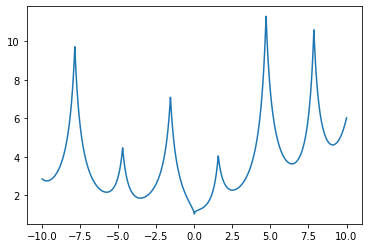

In [7]:
plt.plot(xtest, ytest)

### Model definition

**TASK 1**: In the code below try to set values for relevant hyperparameters, such as the number of nodes, the number of layers, and choose an activation function. Also, using the module **keras.regularizers** try to set parameter norm penalties or add a dropout layer via **layers.Dropout(fraction)** for regularizing your model.

In [8]:
nb_nodes = 1
nb_layers = 1
activation = "" # insert your choice of actiation funciton
reg_strategy = # define your regularization strategy - use L1 and L2 regularization

model = keras.models.Sequential(name="1Dfit")
model.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=reg_strategy, input_dim=xtrain.shape[1]))  # first layer

# insert your code for for creating additional layers 

model.add(layers.Dense(1))  # final layer

print(model.summary())

SyntaxError: invalid syntax (<ipython-input-8-3d3afb7f67ea>, line 4)

### Compile the model

**TASK 2**: Complete the code below by choosing an objective (loss) function for this regression task and optimization method from **keras.optimizers**

In [ ]:
model.compile(loss="", optimizer=)

##### The model is created using SVM algorithm . The resultin3g accuracy is relatef to the question at hand!

### Train the model

**TASK 3**: Complete the code below and train the network for a couple of epochs and save the model several times in between

In [ ]:
epochs = 
save_period =   # after how many epochs the model should be saved?

chkpnt_saver = keras.callbacks.ModelCheckpoint("weights-{epoch:02d}.hdf5", save_weights_only=True, save_freq=save_period)

results = model.fit(
    xtrain,
    ytrain,
    batch_size=64,
    epochs=epochs,
    verbose=1,
    callbacks=[chkpnt_saver]
    )

Compare the performance of the model during the training. You may use the skeleton below:

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

ax1.plot(xtest, ytest, color="black", label="data")
saved_epochs = range(save_period, epochs + 1, save_period)

colors = [plt.cm.jet((i + 1) / float(len(saved_epochs) + 1)) for i in range(len(saved_epochs))]

for i, epoch in enumerate(saved_epochs):
    model.load_weights("weights-{epoch:02d}.hdf5".format(epoch=epoch))
    ypredict = model.predict(xtest).squeeze()
    ax1.plot(xtest.squeeze(), ypredict, color=colors[i], label=epoch)
    ax2.plot(epoch, results.history["loss"][epoch - 1], color=colors[i], marker="o")

ax1.set(xlabel="x", ylabel="some_complicated_function(x)", xlim=(-10, 13), title="")
ax1.grid(True)
ax1.legend(loc="upper right", title="Epochs")

ax2.plot(results.history["loss"], color="black")
ax2.set(xlabel="epoch", ylabel="loss")
ax2.grid(True)
ax2.semilogy()

plt.show()